## 1. Prerequisites

### 1.1 Load packages

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

from pyincore import IncoreClient, Dataset, DataService, HazardService, FragilityService, MappingSet, FragilityCurveSet
from pyincore import HHRSOutputProcess
from pyincore.utils.dataprocessutil import DataProcessUtil

# importing pyIncone analyses:
from pyincore.analyses.buildingdamage import BuildingDamage
from pyincore.analyses.buildingfunctionality import BuildingFunctionality
from pyincore.analyses.combinedwindwavesurgebuildingdamage import CombinedWindWaveSurgeBuildingDamage
from pyincore.analyses.epfdamage import EpfDamage
from pyincore.analyses.montecarlofailureprobability import MonteCarloFailureProbability
from pyincore.analyses.housingunitallocation import HousingUnitAllocation
from pyincore.analyses.populationdislocation import PopulationDislocation, PopulationDislocationUtil
from pyincore.analyses.housingrecoverysequential import HousingRecoverySequential
from pyincore.analyses.socialvulnerability import SocialVulnerability
from pyincore.analyses.capitalshocks import CapitalShocks

# Functions for visualizing the population data results as tables
from pyincore_viz.analysis.popresultstable import PopResultsTable as poptable
from pyincore_viz.geoutil import GeoUtil

In [90]:
client = IncoreClient()
# IN-CORE caches files on the local machine, it might be necessary to clear the memory
# client.clear_cache() 
data_service = DataService(client) # create data_service object for loading files
hazard_service = HazardService(client)
fragility_services = FragilityService(client)

Connection successful to IN-CORE services. pyIncore version detected: 1.9.0


In [5]:
client.clear_cache()

Connection successful to IN-CORE services. pyIncore version detected: 1.13.0


### 1.2 Define hazard

In [ ]:
hazard_type = "hurricane"

# 100yr Hazard Event
hazard_id = "5fa5a9497e5cdf51ebf1add2"

# 500yr Hazard Event
#hazard_id = "5fa5aa19b6429615aeea4476"

# Galveston Hurricane Ike
# hazard_id = "5fa5a228b6429615aeea4410"



### 1.3 Define inventories

#### 1.3.1 Buildings

In [ ]:
# Galveston inventory data
# bldg_dataset_id = "63053ddaf5438e1f8c517fed" # Full city
bldg_dataset_id = "63ff6b135c35c0353d5ed3ac" # Island Only
bldg_dataset_id

#### 1.3.2 Power infrastructure

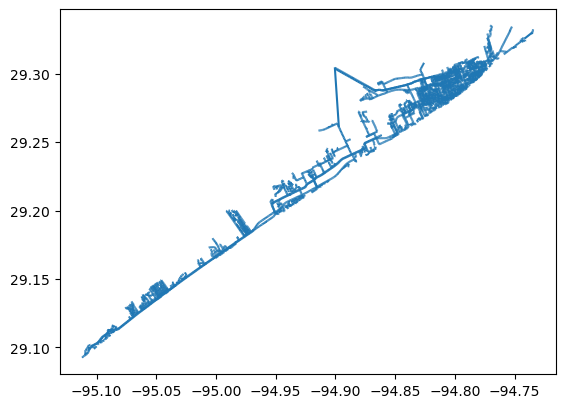

In [3]:
# Load shapefile
shp_power = './data/power_network/power_network.shp'
# Load the shapefile
gdf_power = gpd.read_file(shp_power)
# plot and show
gdf_power.plot()
plt.show()

#### 1.3.3 Transportation infrastructure

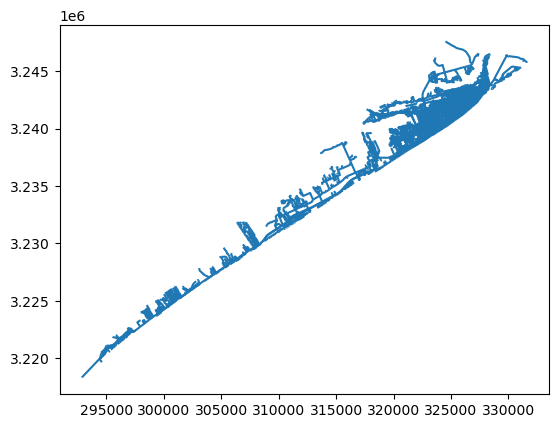

In [4]:
# Load shapefile
shp_transportation = './data/transportation_network/transportation_network.shp'
# Load the shapefile
gdf_transportation = gpd.read_file(shp_transportation)
# plot and show
gdf_transportation.plot()
plt.show()

#### 1.3.4 Paper figure

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S2772741623000388-gr3_lrg.jpg" width="700"/>